In [9]:
import pandas as pd  #pandas does things with matrixes
import numpy as np #used for sorting a matrix
import matplotlib.pyplot as plt #matplotlib is used for plotting data
import matplotlib.ticker as ticker #used for changing tick spacing
import datetime as dt #used for dates
import matplotlib.dates as mdates #used for dates, in a different way
import os #used for changes of directory
import warnings
warnings.filterwarnings("ignore")

In [29]:
dataset_1yr = pd.read_csv("Data/all_stocks_5yr.csv")
dataset_1yr.head()

# Changing the date column to the datetime format (best format to work with time series)
dataset_1yr['Date'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dataset_1yr['Date']]

dataset_1yr.head()

2012-08-13


,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [31]:
dataset_1yr.describe()

,Open,High,Low,Close,Volume
count,606417.000000,606593.000000,606574.000000,606801.000000,6.063950e+05
mean,79.529041,80.257435,78.799338,79.557920,4.500925e+06
std,93.383162,94.187977,92.535300,93.382168,9.336171e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,38.070000,38.460000,37.700000,38.090000,1.077091e+06
50%,59.240000,59.790000,58.690000,59.270000,2.131913e+06
75%,89.390000,90.150000,88.620000,89.430000,4.442768e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [32]:
# Getting rid of null columns

missing_data = pd.DataFrame(dataset_1yr.isnull().sum()).T
print(missing_data)

for index, column in enumerate(missing_data.columns):
    if missing_data.loc[0][index] != 0:
        dataset_1yr = dataset_1yr.drop(dataset_1yr.loc[dataset_1yr[column].isnull()].index)
        
missing_data = pd.DataFrame(dataset_1yr.isnull().sum()).T
print(missing_data)

   Date  Open  High  Low  Close  Volume  Name
0     0   384   208  227      0     406     0
   Date  Open  High  Low  Close  Volume  Name
0     0     0     0    0      0       0     0


In [33]:
# Assigning a mid price column with the mean of the Highest and Lowest values

dataset_1yr['Mid'] = (dataset_1yr['High'] + dataset_1yr['Low'])/2
dataset_1yr.head()

,Date,Open,High,Low,Close,Volume,Name,Mid
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM,92.165
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM,92.255
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM,92.340
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM,93.040
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM,93.945


In [34]:
stocknames = dataset_1yr.Name.unique()
stocknames = np.sort(stocknames, kind='quicksort')
print(stocknames[:20])

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN']


In [46]:
def simple_plot(dataframe, name, feature, interval_day = 60):
    
    allstocksingle = dataframe[dataframe['Name'] == name] #makes matrix with only the stock info
    
    
    #x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in allstocksingle['Date']] #convert date to something python understands
    x = allstocksingle['Date']
    y = allstocksingle[feature] #plots which ever catagory you entered above

    plt.figure(figsize=(12,6))

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) #display the date properly
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = interval_day)) #x axis tick every 60 days
    #plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100)) # sets y axis tick spacing to 100
    
    y_max_lim = dataframe[dataframe['Name'] == name][feature].max() + dataframe[dataframe['Name'] == name][feature].max()/10
    y_min_lim = dataframe[dataframe['Name'] == name][feature].min() - dataframe[dataframe['Name'] == name][feature].min()/10
    
    #plt.ylim(y_min_lim,y_max_lim)
    #plt.xlim(startdate, enddate)
    plt.plot(x,y) #plots the x and y
    plt.grid(True) #turns on axis grid
    plt.xticks(rotation=90,fontsize = 10) #rotates the x axis ticks 90 degress and font size 10
    plt.title(name + ' Stock') #prints the title on the top
    plt.ylabel(feature + ' Price') #labels y axis
    plt.xlabel('Date') #labels x axis

def simple_plot_by_date(dataframe, name, feature, start_day, end_day, interval_day = 60):
    
    startdate = dt.datetime.strptime(start_day, '%Y-%m-%d').date() #enter the start date here, it must be YYYY-MM-DD
    enddate = dt.datetime.strptime(end_day, '%Y-%m-%d').date() #enter the end date here, it must be YYYY-MM-DD
    
    allstocksingle = dataframe[dataframe['Name'] == name] #makes matrix with only the stock info

    #x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in allstocksingle['Date']] #convert date to something python understands
    x = allstocksingle['Date']
    y = allstocksingle[feature] #plots which ever catagory you entered above

    plt.figure(figsize=(12,6))

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) #display the date properly
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = interval_day)) #x axis tick every 60 days
    #plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100)) # sets y axis tick spacing to 100
    
    y_max_lim = dataframe[dataframe['Name'] == name][feature].max() + dataframe[dataframe['Name'] == name][feature].max()/10
    y_min_lim = dataframe[dataframe['Name'] == name][feature].min() - dataframe[dataframe['Name'] == name][feature].min()/10
    
    plt.ylim(y_min_lim,y_max_lim)
    plt.xlim(startdate, enddate)
    plt.plot(x,y) #plots the x and y
    plt.grid(True) #turns on axis grid
    plt.xticks(rotation=90,fontsize = 10) #rotates the x axis ticks 90 degress and font size 10
    plt.title(name + ' Stock') #prints the title on the top
    plt.ylabel(feature + ' Price') #labels y axis
    plt.xlabel('Date') #labels x axis

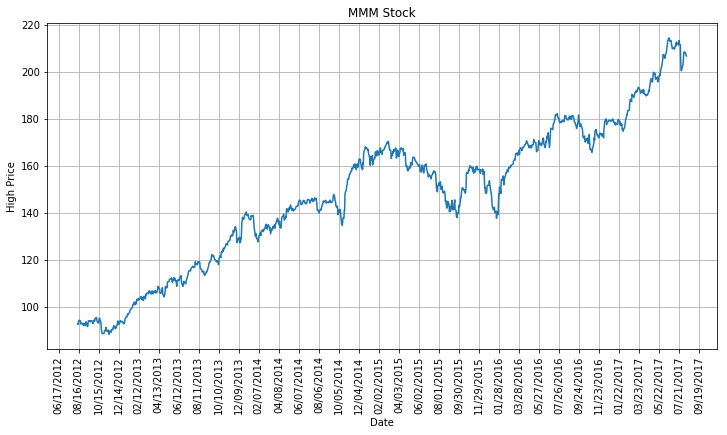

In [47]:
fig1 = simple_plot(dataset_1yr, 'MMM', 'High')
#plt.savefig('stock.pdf')

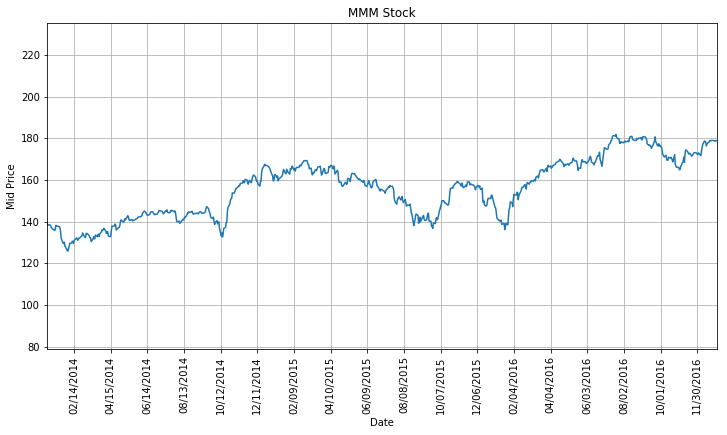

In [48]:
simple_plot_by_date(dataset_1yr, 'MMM', 'Mid', '2014-01-01', '2017-01-01')

In [94]:
# Let's analyze 3M stocks a bit deeper

MMM_stocks = dataset_1yr[dataset_1yr['Name'] == 'MMM']

MMM_stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Mid
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM,92.165
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM,92.255
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM,92.340
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM,93.040
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM,93.945


In [95]:
# Creating a percent change column related to the closing price

percent_change_closing_price = MMM_stocks['Close'].pct_change()
percent_change_closing_price.fillna(0, inplace=True)

MMM_stocks['PC_change'] = pd.DataFrame(percent_change_closing_price)
MMM_stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Mid,PC_change
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM,92.165,0.000000
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM,92.255,-0.001082
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM,92.340,0.002600
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM,93.040,0.012967
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM,93.945,0.005334


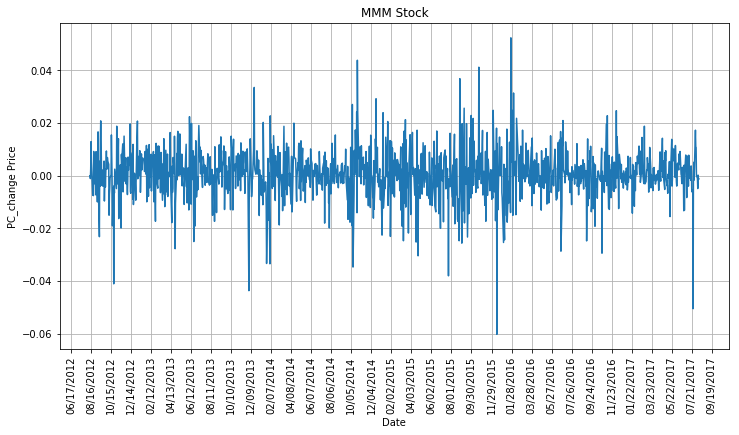

In [96]:
simple_plot(MMM_stocks, 'MMM', 'PC_change')

In [97]:
#daily_log_returns_shift = np.log(MMM_stocks['Close'] / MMM_stocks['Close'].shift(1))
#daily_log_returns_shift.fillna(0, inplace=True)
#MMM_stocks['Daily_Returns'] = pd.DataFrame(daily_log_returns_shift)
#MMM_stocks.head()                                                         

In [98]:
# Checking cumulative daily returns of 3M stocks

cum_day_return = (1 + MMM_stocks['PC_change']).cumprod()
MMM_stocks['Daily_Return'] = pd.DataFrame(cum_day_return)

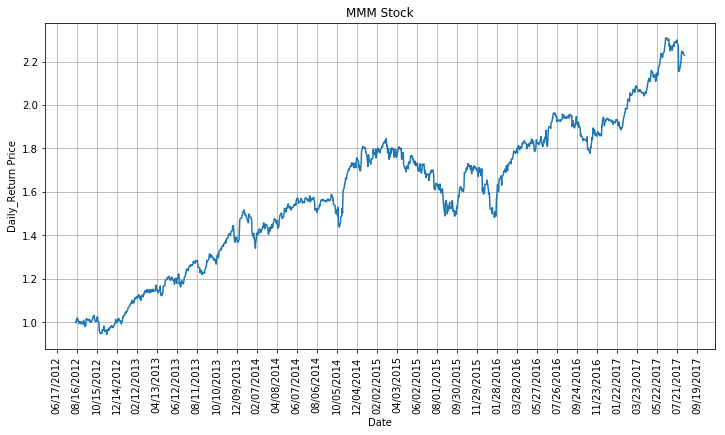

In [99]:
simple_plot(MMM_stocks, 'MMM', 'Daily_Return')

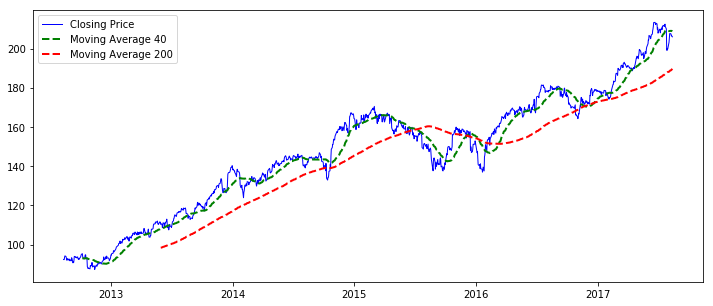

In [160]:
# Printing some moving averages to check smoothness 

closing_price = MMM_stocks['Close']

moving_avg_40 = closing_price.rolling(window=40).mean()
moving_avg_200 = closing_price.rolling(window=200).mean()

plt.figure(figsize=(12,5))

df = pd.DataFrame({'x': MMM_stocks['Date'] , 'y0': MMM_stocks['Close'], 'y1': moving_avg_40, 'y2': moving_avg_200})

plt.plot( 'x', 'y0', data=df, marker='', color='blue', linewidth=1, label = "Closing Price")
plt.plot( 'x', 'y1', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label = "Moving Average 40")
plt.plot( 'x', 'y2', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="Moving Average 200")
plt.legend()

In [193]:
# Let's apply some models to predict closing prices
# Total of samples = 1257

#training_size = int(closing_price.shape[0]*0.9)
training_size = 1000

train_data = np.array(closing_price[:training_size])
test_data = np.array(closing_price[training_size:])

print(train_data.shape)
print(test_data.shape)

(1000,)
(257,)


In [195]:
#train_data = train_data.reshape(-1,1)
#scaler.fit(train_data)
#train_data = scaler.transform(train_data)

#pd.DataFrame(train_data).plot()

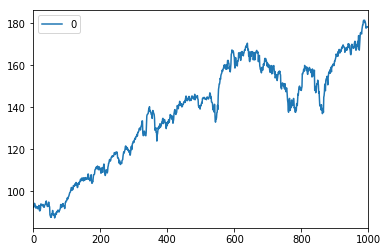

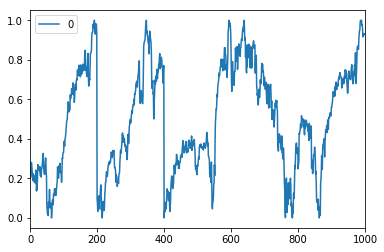

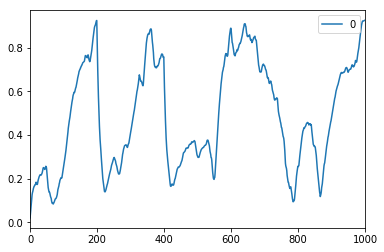

In [194]:
# Let's normalize data based on the training data
# Based on that, since we have 5 years of data, let's apply a moving window normalization
# approximately for every year we have.
# It will make the trend feature of the series disappear.

from sklearn.preprocessing import MinMaxScaler # It scales the data between 0 and 1

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)
moving_window_size = 200

pd.DataFrame(train_data).plot()

scaler = MinMaxScaler()

for di in range(0, 1000, moving_window_size):
    scaler.fit(train_data[di:di+moving_window_size,:])
    train_data[di:di+moving_window_size,:] = scaler.transform(train_data[di:di+moving_window_size,:])
    
#scaler.fit(train_data[di+moving_window_size:,:])
#train_data[di+moving_window_size:,:] = scaler.transform(train_data[di+moving_window_size:,:])

# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data based on data from the training
test_data = scaler.transform(test_data).reshape(-1)

pd.DataFrame(train_data).plot()

# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data

EMA = 0.0
gamma = 0.1
for ti in range(1000):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

pd.DataFrame(train_data).plot()    
    
# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

MSE error for standard averaging: 0.00450


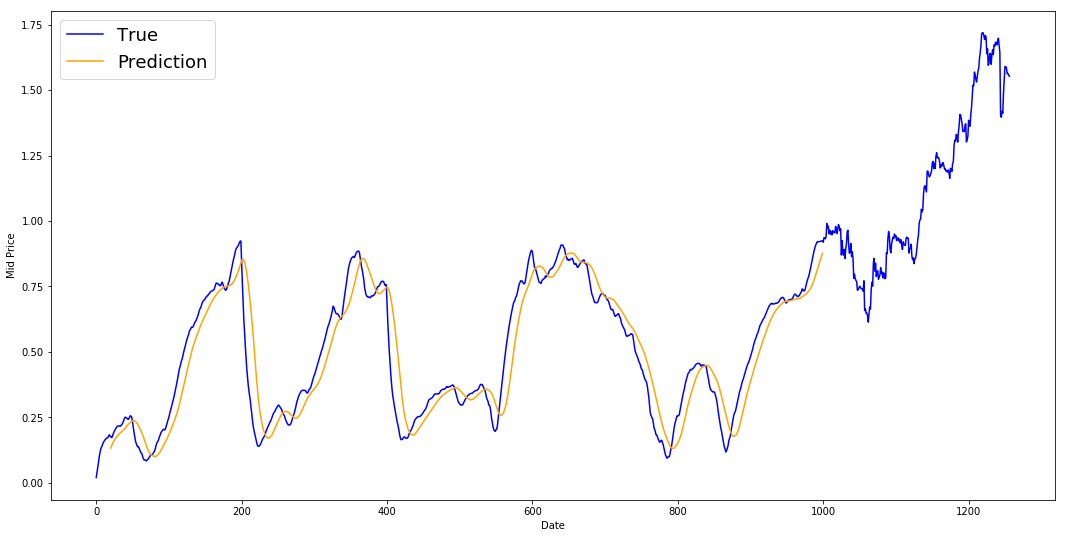

In [214]:
# Moving Average

window_size = 20
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    date = MMM_stocks.loc[pred_idx,'Date']
    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

plt.figure(figsize = (18,9))
plt.plot(range(MMM_stocks.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

MSE error for EMA averaging: 0.00116


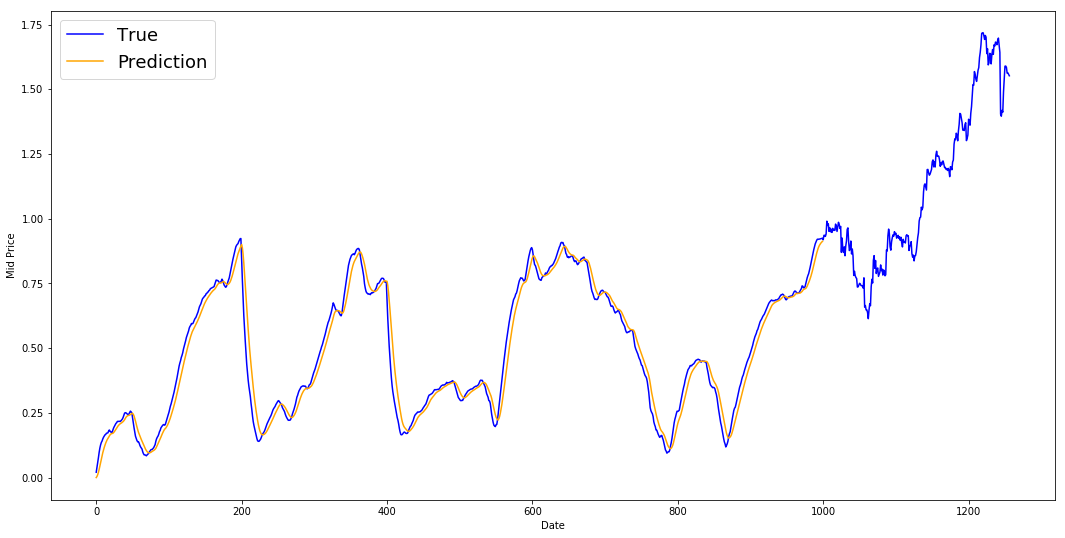

In [225]:
# Exponential Moving Average

window_size = 20
N = train_data.size
run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.8

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

plt.figure(figsize = (15,8))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

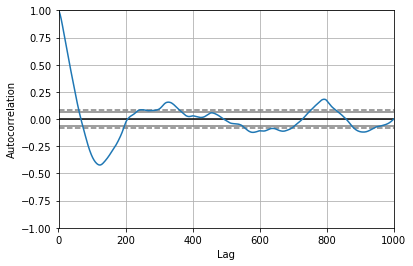

Test Mean Squared Error (smaller the better fit): 0.001


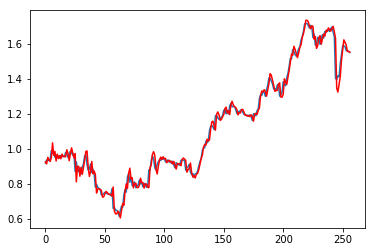

In [252]:
# ARIMA 
# Parameters 
# p: The number of lag observations included in the model, also called the lag order.
# d: The number of times that the raw observations are differenced, also called the degree of differencing.
# q: The size of the moving average window, also called the order of moving average.
# -> Follow the Box-Jenkins Methodology.

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

pd.plotting.autocorrelation_plot(pd.DataFrame(train_data))
plt.show()
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

Actual = [x for x in train_data]
predictions = list()

for timepoint in range(len(test_data)):
    ActualValue =  test_data[timepoint]
    #forecast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0) 
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    predictions.append(Prediction)
    Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(test_data, predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()    

In [ ]:
# LSTM